### Import relevant modules

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import kn_calc_functions as knf
%matplotlib inline

# Basic example: fluid Love numbers $k_n$ for a constant-density planet
Create a constant density (i.e., single-layer) planet by generating a random number for the radius and one for the density.


n   k_n
02  1.5000
03  0.7500
04  0.5000
05  0.3750
06  0.3000
07  0.2500
08  0.2143
09  0.1875
10  0.1667


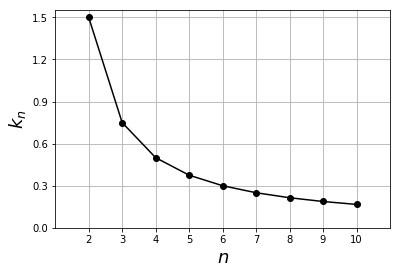

In [43]:
rad, den = np.random.rand(1)+1., np.random.rand(1)+1.

# Initialize the variables for the Love numbers and the degree
kn = []
degree = range(2,11)

# Calculate the Love numbers
for n in degree:
    kn.append(knf.calc_kn(n,rad,den))

# Print out results
print("n   k_n")
for n,k in zip(degree,kn): print("%02i  %5.4f"%(n,float(k)))

# Create figure
nticks = [i for i in degree]
nlabel = [str(i) for i in nticks]
kticks = [i*0.300 for i in range(6)]
klabel = ["%2.1f"%i for i in kticks]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(degree,kn,'k-o')
ax.set_ylim([0,1.55])
ax.set_xlim([min(degree)-1,max(degree)+1])
ax.set_xlabel(r"$n$",fontsize = 18)
ax.set_ylabel(r"$k_n$",fontsize = 18)
ax.xaxis.set_ticks(nticks)
ax.xaxis.set_ticklabels(nlabel)
ax.yaxis.set_ticks(kticks)
ax.yaxis.set_ticklabels(klabel)
plt.grid()


# Earth Fluid Love number $k_2$ from PREM density profile

## PREM data from the IRIS database
The data can be loaded directly from the IRIS website using pandas. However, pandas is not (yet) part of every python installation. Thus, the file, located @http://ds.iris.edu/files/products/emc/data/PREM/PREM_1s.csv is included in the repository. The pandas snippet is commented out below.

The PREM contains surface-to-center arrays. Before calculating the Love numbers one needs to flip them and remove the central point, given that the radial vector should contain the outer boundary of each shell. (See also the README.md in the repository.)

In [46]:
## ---------------------------- DOWNLOAD PREM USING PANDAS --------------------------------------------
## Since the file is provided without header, the column names are supplied using information available
## in the relevan IRIS webpage (http://ds.iris.edu/ds/products/emc-prem/)

#import pandas as pd
#prem_url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_1s.csv"
#prem_data = pd.read_csv(prem_url,header=None)
#prem_data.columns = ['radius','depth','density','Vpv','Vph','Vsv','Vsh','eta','Q-mu','Q-kappa']
#rad = np.flip(np.asarray(prem_data.radius),0)[1:]
#den = np.flip(np.asarray(prem_data.density),0)[1:]

In [47]:
## ---------------------- READ PREM FROM THE FILE IN THE REPOSITORY -------------------------------------
prem_file = 'PREM_1s.csv'
rad,den = np.loadtxt(prem_file,unpack=True,usecols=(0,2),delimiter=',')
rad = np.flip(rad,0)[1:]
den = np.flip(den,0)[1:]

## Compute and print values for $k_2$

In [48]:
print("Earth fluid Love number k_2: %8.7f"%(float(knf.calc_kn(2,rad,den))))

Earth fluid Love number k_2: 0.9346387
